# Polynomial Chaos methods

## Polynomial Chaos expansion 

### Generalized Polynomial Chaos

Let $\xi$ be a random variable with a distribution function $F$.

The *generalized polynomial chaos* basis functions $\{p_i\}$ are the orthogonal polynomial functions satisfying
$$
\mathbb E[p_n(\xi)p_m(\xi)]=
\int p_n(\tau)p_m(\tau)\,\text{d}F(\tau)=
\delta_{nm}\gamma_n.
$$
Here $\gamma_n=\mathbb E\bigl[p_n^2(\xi)\bigr]$.

If $\xi$ is absolutely continuous, we have an (already known) relation for classical orthogonal polynomials
$
\int p_n(\tau)p_m(\tau)\rho(\tau)\,\text{d}\tau=
\delta_{nm}\gamma_n.
$

In the case of discrete distribution, the orthogonality relation reads
$$
\sum_ip_n(z_i)p_m(z_i)\rho_i=
\delta_{nm}\gamma_n.
$$

#### Correspondence between the Type of Generalized Polynomial Chaos and Their Underlying Random Variables

|&nbsp;    |Distribution of $\xi$|gPC basis polynomials|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Support|
|--------- |------------|---------------------|:-------:|
|Continuous|Gaussian|                               Hermite  |$(-\infty,\,+\infty)$|
|&nbsp;    |Gamma   |                               Laguerre |$[0,\,+\infty)$|
|&nbsp;    |Beta    |                               Jacobi   |$[a,\,b]$|
|&nbsp;    |Uniform |                               Legendre |$[a,\,b]$ |
|Discrete  |Poisson |                               Charlier |$\{0,\,1,\,2,\,\ldots\}$|
|&nbsp;    |Binomial|                              Krawtchouk|$\{0,\,1,\,2,\,\ldots,\,N\}$|
|&nbsp;    |Negative binomial|                        Meixner|$\{0,\,1,\,2,\,\ldots\}$|
|&nbsp;    |Hypergeometric|                              Hahn|$\{0,\,1,\,2,\,\ldots,\,N\}$|


### Definition (Strong gPC approximation)


_Let $f(\xi)$ be a function of a random variable $\xi$ whose probability distribution is $F$.
A generalized polynomial chaos approximation in a strong sense is $f_N ∈ \mathcal P_N$, where $\mathcal P_N$ is the space of polynomials of degree up to $N$,
such that $\|f(\xi)−f_N(\xi)\|→0$ as $N →∞$, in a proper norm._


The example of strong gPC approximation is **orthogonal projection**.

Let $L_2$ be a normed space of functions with the norm
$$
\|f\|_{L_2}^2=\mathbb E\left(f^2(\xi)\right).
$$
For any function $f\in L_2$ we define its $N^\text{th}$-degree gPC orthnogonal projection $\text{Pr}_N$ as
$$
\text{Pr}_N\,f=\sum_{k=0}^N\hat f_kp_k(x),\qquad
\hat f_k=\frac1{\gamma_k}\mathbb E\left(f(\xi)p_k(\xi)\right)
$$

From the classical theory we know, that
$$
\|f−\text{Pr}_N\,f\|_{L_2}→0 \,\,\text{ as }\,\, N →∞.
$$
(This convergence does not imply, of course, pointwise convergence).

The following optimality property holds:
$$
\|f−\text{Pr}_N\,f\|_{L_2}=
\inf_{g\in \mathcal P_N}\|f−g\|_{L_2}.
$$


What is the  approximation in a strong sense?

The convergence in the strong norm implies convergence in probability
$$
f_N\mathop{\to}\limits^{\mathbb P} f
$$
which, in turn, implies the convergence in distribution
$$
f_N\mathop{\to}\limits^d f.
$$

Informally speaking, the use of weight allows us to improve the approximation to the most probable values of the output, whereas the exact approximation at points, the probability of obtaining which is small, is not so important.


Recall, that **convergence in probability**
means that for all $\varepsilon>0$
$$
\mathbb P(\left|f_N-f\right|>\varepsilon)\to0,\qquad N\to\infty,
$$
and **convergence in distribution** (or weak convergence) means that
$$
\mathbb E[h(f_N)]\to\mathbb E[h(f)],\qquad N\to\infty
$$
for all bounded and continuous functions $h$.
Convergence in distribution
holds if and only if for all continuous points $x$ of CDF $F_f(x)$ the relation
$$
F_{f_N}(x)\to F_f(x)
$$
is satisfied.
If $F_f$ is continuous, this is a uniform convergence.

#### Example (Lognormal r.v.)

Let $\eta=e^\xi$,  where $\xi\sim\mathcal N(\mu, \sigma)$.

The distribution of $\eta$ is a **lognormal distribution** whose support is on the nonnegative axis and is widely used in practice to model random variables not allowed to have negative values.

$$
\left(
    \begin{gather}
        \Pr\{e^\xi < x\} = \Pr\{\xi < \ln x\} = \Phi(\ln x)\\
        \rho(x) = \frac{d}{dx}(\Phi(\ln x) = \frac{1}{x}\Phi'(\ln x)
    \end{gather}  
\right)
$$

Its probability density function is
$$
\rho_\eta(x)=\frac1{x\sigma\sqrt{2\pi}}\exp\left(-\frac{(\ln x-\mu)^2}{2\sigma^2}\right).
$$

Let's obtain gPC projection of $\eta$.

If $\theta\sim\mathcal N(0, 1)$ then
$\xi=\mu+\sigma\theta$
and
$
\eta=f(\theta)=e^\mu e^{\sigma\theta}.
$

We will use the Hermite polynomials $\{H_i\}$ because of the normal distribution.

The coefficients of the expansion are
$$
    \hat f_k=
    \frac1{\gamma_k}e^\mu
    \int_{-\infty}^{+\infty}e^{\sigma x}H_k(x)e^{-x^2/2}\,\text{d}x=
%
    \frac1{\gamma_k}e^\mu e^{\sigma^2/2}
    \int_{-\infty}^{+\infty}H_k(x)e^{-(x-\sigma)^2/2}\,\text{d}x=
%
    [y\to x+\sigma]=
%
    \frac1{\gamma_k}e^\mu e^{\sigma^2/2}
    \int_{-\infty}^{+\infty}H_k(y+\sigma)e^{-y^2/2}\,\text{d}y=
$$

$$
    \frac1{\gamma_k}e^{\mu+\sigma^2/2}
    \int_{-\infty}^{+\infty}\sum_{i=0}^k{k \choose i}\sigma^{k-i}H_i(y)e^{-y^2/2}\,\text{d}y=
    e^{\mu+\sigma^2/2}\frac{\sigma^k}{k!}.
$$

So, we get an approximant
$$
\text{Pr}_N\eta(\theta)=
\eta_N(\theta)=e^{\mu+\sigma^2/2}\sum_{k=0}^N\frac{\sigma^k}{k!}H_k(\theta).
$$ 
Below you can find a more detailed conclusion of this relation.

Here we use the [Taylor expansion](https://en.wikipedia.org/wiki/Hermite_polynomials#Recursion_relation) of the Hermit polynomial
$$
H_k(x+y)=
\sum_{i=0}^k{k \choose i}x^{k-i}H_i(y)
$$
and the orthogonality of the basis
$$
\int_{-\infty}^\infty H_k(x)e^{-x^2/2}\,\text{d}x=
\int_{-\infty}^\infty H_0(x) H_k(x)e^{-x^2/2}\,\text{d}x=
\sqrt{2\pi}\delta_{0k}.
$$
Recall that
$$
\gamma_k=\sqrt{2\pi}k!.
$$

In this particular case we can get the expansion faster.

Recall the [generating_function](https://en.wikipedia.org/wiki/Hermite_polynomials#Generating_function)
for the Hermit polynomials
$$
e^{xt - t^2/2} = \sum_{n=0}^\infty H_n(x) \frac{t^n}{n!},
$$
so
$$
e^{\mu+\sigma\theta}=
e^{\mu+\sigma^2/2+\sigma\theta-\sigma^2/2}=
e^{\mu+\sigma^2/2}e^{\sigma\theta-\sigma^2/2}=
e^{\mu+\sigma^2/2}\sum_{k=0}^\infty\frac{\sigma^k}{k!}H_k(\theta).
$$

### Definition  (Weak gPC approximation)

Above, we need to know the function $f$ explicitly to find $\hat f_k$ and the approximant that converges strongly.
Sometimes, only the probability distribution of $f$ is known.
We can still build the approximation, but it converges in a weak sense in this case.

_Let $\eta$ be a random variable with distribution function $F_\eta(x) = \mathbb P(\eta ≤ x)$ and let $\theta$ be a (standard) random variable in a set of gPC basis functions. A weak gPC approximation is $\eta_N ∈ \mathcal P_N(\theta)$, where $\mathcal P_N(\theta)$ is the linear space of polynomials of $\theta$ of degree up to N ≥ 0, such that $\eta_N$ converges to $\theta$ in a weak sense, e.g., in probability._

The strong approximation implies weak, but not vise versa.


#### Example (not uniqueness of weak approximation)

Let $\eta\in\mathcal N(\mu,\,\sigma)$ be a r.v. with normal distribution.
We take $\theta\in\mathcal N(0,\,1)$ and Hermit polynomials as a basis.
The first order expansion
$$
\eta_1(\theta)=\mu H_0(\theta)+\sigma H_1(\theta)=\mu+\sigma\theta
$$
will have the same distribution as $\eta$.
Therefore, $\eta_1(\theta)$ can approximate the distribution of $\eta$ *exactly*.
But we cannot reproduce pathwise realizations of $\eta$ via $\eta_1(\theta)$.
The random variable 
$$\tilde\eta_1(\theta)=\mu-\sigma\theta
$$
has the same distribution as $\eta$ either, but obviously different pathwise realizations from $\eta_1(\theta)$.

As a consequence, we cannot find the coefficients $a_k$ of the expansion 
$$
\sum_{i=0}^Na_kp_k(x)
$$
via mathematical expectation (as previous for $\hat f_k$)
$$
a\mathop{=}\limits^{?}
\frac1{\gamma_k}\mathbb E[\eta p_k(\theta)]
$$
because this expectations can differ from one realization of $\eta$ to another.

To make this expectation unique we use the following trick.
We will sample both $\theta$ and $\eta$ using the same underlying r.v. with uniform distribution (See Lecture 2 for the method of sampling a random variable with known CDF and for definition of $F^{-1}$).
Namely, let $\xi\sim\mathcal U(0,\,1)$ and let
$$
\theta=F^{-1}_{\theta}(\xi),\qquad
\eta=F^{-1}_{\eta}(\xi).
$$
Then
$$
a_k=
\frac1{\gamma_k}
\mathbb E_{\mathcal\xi}\left[F^{-1}_\eta(\xi)p_k(F^{-1}_\theta(\xi))\right]=
%
\frac1{\gamma_k}\int_0^1F^{-1}_\eta(x)p_k(F^{-1}_\theta(x))\,\text{d}x.
$$


We can even simplify the last formula in the case when $F_\theta$ is continuous, which entails $F_\theta(\theta)\sim\mathcal  U(0,\,1)$ and
$$
a_k=
\frac1{\gamma_k}
\mathbb E_{\mathcal\theta}\left[F^{-1}_\eta(F_\theta(\theta))p_k(\theta)\right]=
%
\frac1{\gamma_k}\int_{-\infty}^{+\infty} F^{-1}_\eta(F_\theta(x))p_k(x)\,\text{d}F_\theta(x).
$$

This is the essence of the following<br>
**Theorem.**
*Let $\eta$ be a random variable with CDF $F_\eta(x)$ and $\mathbb E[\eta^2]<\infty$.
Let $\theta$ be a random variable with continuous CDF $F_\theta(x)$ and let $\mathbb E\left[\left|\theta\right|^{2m}\right]<\infty$ for all $m\in\mathbb N_0$.
Let 
$$
\eta_N=\sum_{i=0}^Na_kp_k(\theta)
$$
where $a_k$ are defined in the formula above on this slide.
Then $\eta_N$ converges to $\eta$ in probability
$$
\eta_N\mathop\to\limits^{\mathbb P}\eta.
$$*

Also $\eta_N\mathop\to\limits^{d}\eta$ in distribution.



#### Example (Approximating Beta wtih gPC Hermite exapansion in a weak sence)

Let the probability distribution of $\eta$ be a beta distribution with probability density function
$$
\rho(x) =\frac1{\text{Beta}(\alpha,\beta)} x^{\alpha-1}(1-x)^{\beta-1}.
$$
Sure we can choose Jacobi polynomials and there will be nothing to approximate as the first-order polynomial gives the exact value.
But let us approximate beta in terms of normal distribution $\theta\sim\mathcal N(0,1)$. 


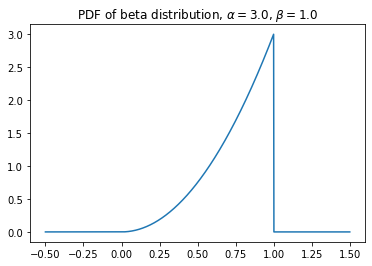

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import beta, norm

alpha_param = 3.0
beta_param  = 1.0

x = np.linspace(-0.5, 1.5, 2**10)
beta_rho = beta.pdf(x, a=alpha_param, b=beta_param)
plt.plot(x, beta_rho);
plt.title(r'PDF of beta distribution, $\alpha={}$, $\beta={}$'.format(alpha_param, beta_param));

In [3]:
from numpy.polynomial.hermite import hermval

# norm of H_k
gamma = np.empty(20)
for i in range(len(gamma)):
    gamma[i] = np.math.factorial(i)

# H_k itself
def p_herm(x, n):
    """
    RETURNS H_n(x)
    value of non-normalized Probabilistic polynomials
    """
    cf = np.zeros(n+1)
    cf[n] = 1
    return (2**(-float(n)*0.5))*hermval(x/np.sqrt(2.0), cf)


In [4]:
from scipy.integrate import quad

F_eta_inv = lambda x : beta.ppf(x, a=alpha_param, b=beta_param)
rho_theta = lambda x : norm.pdf(x)
F_theta = lambda x : norm.cdf(x)

def calc_a_k(num=10):
    a_k = np.zeros(num)
    for i in range(len(a_k)):
        a_k[i] = 1.0/gamma[i]*\
        quad(lambda x : F_eta_inv(F_theta(x))*p_herm(x, i)*rho_theta(x), -np.inf, np.inf)[0]
    return a_k

a_k = calc_a_k()

print('Coefficients a_k are built')

Coefficients a_k are built


We have calculated coefficients $a_k$ using ```scipy.integrate```.
Now, we will compare the exact distribution of r.v. $\eta$ (beta distribution) and the distribution of the approximant $\eta_N$ with different number of terms in the expansion.

To plot the distribution of $\eta_N$ we will use Monte-Carlo simulation, and therefore this distribution will be empirical. But if the number of Monte-Carlo simulations is large ($\sim10^6$) the difference with the exact value of PDF of $\eta_N$ is not significant.

In [5]:
# Build the approximant
def eta_N(N, x):
    res = np.zeros_like(x)
    for i in range(N):
        res += a_k[i]*p_herm(x, i)
        
    return res

def calc_empirical_pdf(mc_N = int(1e6), max_pow = 9):
    rand_sample = np.random.randn(mc_N)
    empirical_pdf = np.empty((max_pow, mc_N))
    for i in range(max_pow):
        empirical_pdf[i, ...] = eta_N(i, rand_sample)
        
    return empirical_pdf

empirical_pdf = calc_empirical_pdf()

def plot_approx(N=5):
    plt.plot(x, beta_rho, label='True PDF');
    plt.hist(empirical_pdf[N], bins=100, density=True, range=(-0.5, 1.5), histtype='step', label='Approx. empirical PDF');
    plt.legend(loc='upper left');
    plt.title('Number of terms in expansion = {}'.format(N));
    
from ipywidgets import interact, fixed, widgets

print('Empirical pdf is built')

Empirical pdf is built


In [6]:
interact(plot_approx,  
         N=widgets.IntSlider(min=1,max=8,step=1,value=2,continuous_update=False,description='# of terms (N)'));

interactive(children=(IntSlider(value=2, continuous_update=False, description='# of terms (N)', max=8, min=1),…

We will repeat the calculation for the case $\alpha=1$ and $\beta=1$.
Beta distribution becomes uniform distribution with this set of parameters.

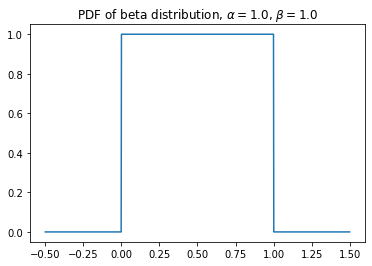

In [12]:
alpha_param = 1.0
beta_param  = 1.0

x = np.linspace(-0.5, 1.5, 2**10)
beta_rho = beta.pdf(x, a=alpha_param, b=beta_param)
plt.plot(x, beta_rho);
plt.title(r'PDF of beta distribution, $\alpha={}$, $\beta={}$'.format(alpha_param, beta_param));

In [7]:
F_eta_inv = lambda x : beta.ppf(x, a=alpha_param, b=beta_param)

a_k = calc_a_k()
print('Coefficients a_k are built')

empirical_pdf = calc_empirical_pdf()
print('Empirical pdf is built')

Coefficients a_k are built
Empirical pdf is built


In [13]:
interact(plot_approx,  
         N=widgets.IntSlider(min=1,max=8,step=1,value=2,continuous_update=False,description='# of terms (N)'));

interactive(children=(IntSlider(value=2, continuous_update=False, description='# of terms (N)', max=8, min=1),…

We can see, that even with a rather large number of terms in expansion we have artefacts near the ends of the interval. It is so called [Gibbs phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

You can reproduce this effect by expanding the PDF of uniform distribution in a Fourier series and plot a sum of a finite number of terms.

### Polynomial chaos in multivariate case

Let the input r.v. $\theta$ be a random $d$-dimensional vector, not a scalar
$$
\theta=(\theta_1,\,\theta_2,\,\ldots,\,\theta_d)
$$
and we assume, that its components are independent (but not necessary identically distributed in general).

The multivariate CDF is
$$
F_\theta(x_1,\,x_2,\,\ldots,\,x_d)=
\prod_{i=1}^dF_{\theta_i}(x_i).
$$

We take a product of polynomials of one variable as a basis functions $P_i$
$$
P_{i}(\theta)=p_{i_1}(\theta_1)p_{i_2}(\theta_2)\cdots p_{i_d}(\theta_d).
$$

the mathematical expectation is calculated independently for each component.

Here $i$ is a multiindex
$$
i=(i_1,\,i_2,\,\ldots,\,i_d).
$$

But what is the meaning of $\mathcal P_N$ now, and how to truncate an expansion, i.e. how to sort $i$?

One  of the strategy is to use maximum of components of $i$ — $\max_ki_k$ as a sort key which means sort the basis polynomial according to maximum monomial power.
If we take $q$ as a maximum power, then the dimension of the polynomials space $\mathcal P_N$ will be $q^d$.  

But it is not a good idea as
the complexity of a multidimensional polynomial depends more on the total degree of monomials in it rather than on the maximum power of each monomial. 

So, another idea is to use a sum $\sum_{i=k}^di_k$ of all components of $i$ as a sorting criterion.
The dimension of $\mathcal P_N$ is ${q+d\choose q}$ in this case. 

Let us illustrate both this methods in 2D case.

In [20]:
q = 6
sz = 10
rng = np.arange(sz)
i, j = np.meshgrid(rng, rng)
A_max_pow = (np.maximum.reduce((i,j)) <= q).astype(int)
A_sum_pow = (i + j <= q).astype(int)

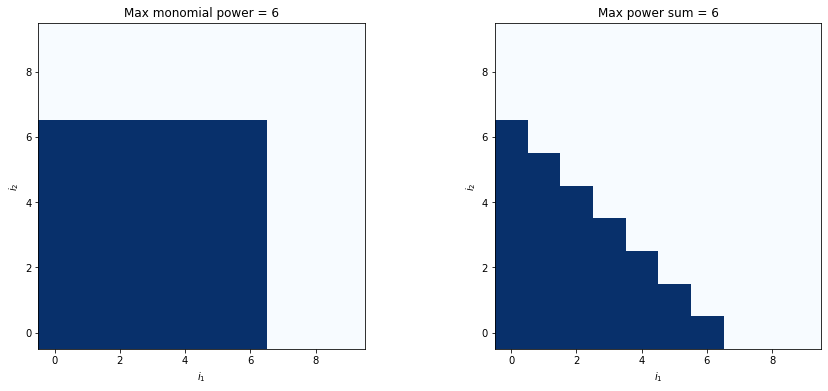

In [21]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.imshow(A_max_pow, origin='lower', interpolation=None, cmap='Blues');
ax1.set_title('Max monomial power = {}'.format(q))
ax1.set_xlabel('$i_1$')
ax1.set_ylabel('$i_2$')
ax2.imshow(A_sum_pow, origin='lower', interpolation=None, cmap='Blues');
ax2.set_title('Max power sum = {}'.format(q));
ax2.set_xlabel('$i_1$')
ax2.set_ylabel('$i_2$');

The extension of the latter is the so-called **hyperbolic truncation scheme**.
In this scheme we use the following condition to select indices
$$
i_1^r+i_2^r+\cdots+i_d^r\leq q^r.
$$
Here $r\in(0,1]$ is a parameter of the scheme.
In the case $r=1$ this is the simple maximum degree scheme. 

The advantages of this scheme are manifested on large dimensions, when it is necessary to choose a small number of basis polynomials.
For example, let $d=50$. 
If we use max component scheme ($\max_ki_k$), we can get one (trivial) basis function in the case of $q=0$ and $50^2=2500$ in the case $q=1$.
In contrast, let $r=0.3$ in hyperbolic truncation scheme, then we get $N=101$ number of basis functions ($q=1$); $N=151$ for $q=2$ and so on.

In the case of simple max power scheme ($r=1$) the situation is a little  better than in max component scheme, we have $N=1+{50\choose1}={51\choose50}=51$ when $q=1$ and $N=1+{50\choose1}+2{50\choose2}={52\choose50}=1326$ when $q=2$. But the gap between this two numbers is large.

Let us illustrate hyperbolic truncation scheme.

In [16]:
def plot_HTS_matrix(q=2, r=1):
    sz = 15
    rng = np.arange(sz)
    i, j = np.meshgrid(rng, rng)
    A_HTS = (i**r + j**r <= q**r).astype(int)
    
    plt.imshow(A_HTS, origin='lower', interpolation=None, cmap='Blues');
    plt.title('Max sum = {}, power = {}'.format(q, r))
    plt.xlim([-0.5, sz - 0.5]) # bug in imshow
    plt.ylim([-0.5, sz - 0.5])
    plt.xlabel('$i_1$')
    plt.ylabel('$i_2$')

In [17]:
interact(plot_HTS_matrix,  
         q=widgets.FloatSlider(min=4,max=20,step=.25,value=10,continuous_update=True,description='q'),
         r=widgets.FloatSlider(min=0,max=1,step=.1,value=0.6,continuous_update=True,description='r'));

interactive(children=(FloatSlider(value=10.0, description='q', max=20.0, min=4.0, step=0.25), FloatSlider(valu…

It is convenient to use a single index instead of multiindex in sums and other formulas.

Denote $$|i|=\sum_{l=1}^di_l^r.$$

For clarity we will show a correspondence between multiindex $i$ and a single index (not related to $|i|$) $k$ as well as sorting strategy.

In [13]:
import itertools
def indeces_K(d, N, r=1.0):
    """
    returns all vectors of length l with sum of indices in power p <= q^p, starting form 0
    x^p + y^p <= N^p
    Elements can repeat!
    """
    qp = N**r
    m = int(qp) # max number of non-zero elements
    for cmb in itertools.product(range(N+1), repeat=d):
        if sum(np.array(cmb)**r) <= qp:
            yield cmb
            

def indeces_K_cut(d, N, r=1.0, maxn=None):
    a = indeces_K(d, N, r)
    a = sorted(a, reverse=True)
    a = [el for el, _ in itertools.groupby(a)] # delete duplicates
    a = sorted(a, key=lambda e: max(e))
    a = sorted(a, key=lambda e: np.sum( np.array(e)**r ))
    if maxn is not None:
        a = a[:maxn]
    return a

def abs_i(i, r=1):
    return (np.array(i)**r).sum()

idx = indeces_K_cut(3, 3)
sum_pow = np.array([abs_i(i) for i in idx])
k = np.arange(1, len(idx)+1)

In [14]:
import pandas as pd
df = pd.DataFrame(index=k, data={'$|i|$': sum_pow, 'multiindex $i$': idx})
df.index.name = 'single index $k$'
df[['multiindex $i$', '$|i|$']]

,multiindex $i$,$|i|$
single index $k$,,
1,"(0, 0, 0)",0
2,"(1, 0, 0)",1
3,"(0, 1, 0)",1
4,"(0, 0, 1)",1
5,"(1, 1, 0)",2
6,"(1, 0, 1)",2
7,"(0, 1, 1)",2
8,"(2, 0, 0)",2
9,"(0, 2, 0)",2


#### Statistical properties

As was mentioned in Lecture 1, if we have a polynomial approximation in one variable of the another r.v. $\eta$, we can easily obtain the mean and the variance of $\eta$.

The same relation has the same form in the multidimensional case.

Let us consider a more complicated case, when there is a random process $f(t,\,\theta)$ that depends on time $t$, which we approximate by multivariate polynomials
$$
f(t,\,\theta)\approx
f_N(t,\,\theta)=\sum_{|i|\leq N}\hat f_i(t)P_i(\theta).
$$

Then the mean $\mu(t)$ can be estimated as
$$
\mu(t):=\mathbb E_\theta[f(t,\,\theta)]\approx \hat f_0(t),
$$
the variance
$$
\mathop{\text{Var}}f(t,\,\theta):=\mathbb E_\theta\left[\bigl(f(t,\,\theta)-\mu(f)\bigr)^2\right]\approx \sum_{0<|i|\leq N}\gamma_i\hat f_i^2(t),
$$
and the covariance of the process at different times $t_1$ and $t_2$
$$
C(t_1,\,t_2):=\mathbb E_\theta\bigl[\bigl(f(t_1,\,\theta)-\mu(t_1)\bigr)\bigl(f(t_2,\,\theta)-\mu(t_2)\bigr)\bigr]\approx
\sum_{0<|i|\leq N}\gamma_i\hat f_i(t_1)\hat f_i(t_2).
$$
